In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pymongo import MongoClient


In [106]:
#df = pd.read_csv("zomato-restaurants-data/zomato.csv", encoding='latin1')

#### Functions for Mongo connection and retrieval of data in dataframe

In [107]:
def _connect_mongo(host, port, username, password, db):
    """ A util for making a connection to mongo """

    if username and password:
        mongo_uri = 'mongodb://%s:%s@%s:%s/%s' % (username, password, host, port, db)
        conn = MongoClient(mongo_uri)
    else:
        conn = MongoClient(host, port)


    return conn[db]


def read_mongo(db, collection, query={}, host='localhost', port=27017, username=None, password=None, no_id=True):
    """ Read from Mongo and Store into DataFrame """

    # Connect to MongoDB
    db = _connect_mongo(host=host, port=port, username=username, password=password, db=db)

    # Make a query to the specific DB and Collection
    cursor = db[collection].find(query)

    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(list(cursor))

    # Delete the _id
    if no_id:
        del df['_id']

    return df

In [108]:
df = read_mongo('restaurants', 'zomato_all')

In [109]:
df.head(3)

,Address,Aggregate rating,Average Cost for two,City,Country Code,Cuisines,Currency,Has Online delivery,Has Table booking,Is delivering now,...,Locality,Locality Verbose,Longitude,Price range,Rating color,Rating text,Restaurant ID,Restaurant Name,Switch to order menu,Votes
0,"Third Floor, Mega Fashion Hall, SM Megamall, O...",4.9,1500,Mandaluyong City,162,"Japanese, Sushi",Botswana Pula(P),No,No,No,...,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,4,Dark Green,Excellent,6318506,Ooma,No,365
1,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",4.8,1500,Mandaluyong City,162,"Japanese, Korean",Botswana Pula(P),No,Yes,No,...,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,4,Dark Green,Excellent,6314302,Sambo Kojin,No,229
2,"Third Floor, Century City Mall, Kalayaan Avenu...",4.8,1100,Makati City,162,"French, Japanese, Desserts",Botswana Pula(P),No,Yes,No,...,"Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,3,Dark Green,Excellent,6317637,Le Petit Souffle,No,314


In [110]:
df.describe()

,Aggregate rating,Average Cost for two,Country Code,Latitude,Longitude,Price range,Restaurant ID,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9.551000e+03,9551.000000
mean,2.666370,1199.210763,18.365616,25.854381,64.126574,1.804837,9.051128e+06,156.909748
std,1.516378,16121.183073,56.750546,11.007935,41.467058,0.905609,8.791521e+06,430.169145
min,0.000000,0.000000,1.000000,-41.330428,-157.948486,1.000000,5.300000e+01,0.000000
25%,2.500000,250.000000,1.000000,28.478713,77.081343,1.000000,3.019625e+05,5.000000
50%,3.200000,400.000000,1.000000,28.570469,77.191964,2.000000,6.004089e+06,31.000000
75%,3.700000,700.000000,1.000000,28.642758,77.282006,2.000000,1.835229e+07,131.000000
max,4.900000,800000.000000,216.000000,55.976980,174.832089,4.000000,1.850065e+07,10934.000000


In [111]:
df['Cuisines'].value_counts()

North Indian                                                              936
North Indian, Chinese                                                     511
Fast Food                                                                 354
Chinese                                                                   354
North Indian, Mughlai                                                     334
Cafe                                                                      299
Bakery                                                                    218
North Indian, Mughlai, Chinese                                            197
Bakery, Desserts                                                          170
Street Food                                                               149
Pizza, Fast Food                                                          131
Chinese, Fast Food                                                        118
Mithai, Street Food                                             

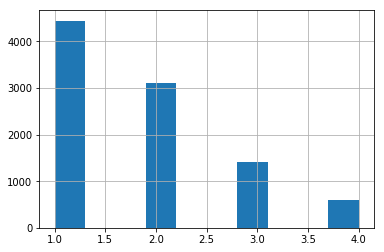

In [112]:
df['Price range'].hist(bins=10)

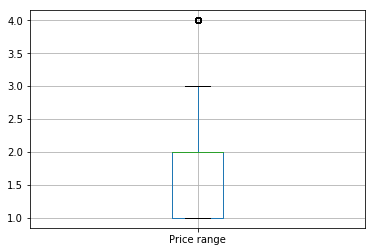

In [113]:
df.boxplot(column='Price range')

/home/nirav/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


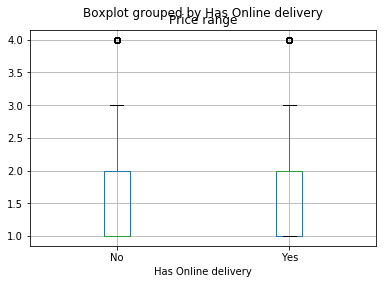

In [114]:
df.boxplot(column='Price range', by='Has Online delivery')

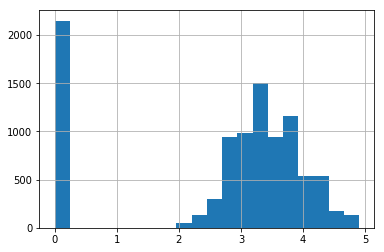

In [115]:
df['Aggregate rating'].hist(bins=20)

### Using Seaborn

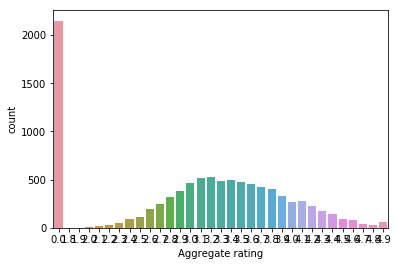

In [116]:
sns.countplot(df['Aggregate rating'])

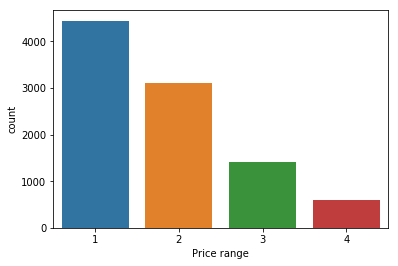

In [117]:
sns.countplot(df['Price range'])

### Note:
It is observed below that majority of the data is based on Indian cities. 

Here, New Delhi is dominating with 5473 restaurants listed.

Gurgaon and Noida are the next 2 notable cities with around 1000 restaurants listed.

In [118]:
df['City'].value_counts()

New Delhi                 5473
Gurgaon                   1118
Noida                     1080
Faridabad                  251
Ghaziabad                   25
Lucknow                     21
Bhubaneshwar                21
Ahmedabad                   21
Guwahati                    21
Amritsar                    21
Rio de Janeiro              20
Allahabad                   20
Sioux City                  20
Surat                       20
Davenport                   20
Birmingham                  20
Rest of Hawaii              20
Athens                      20
Pretoria                    20
Kanpur                      20
Cape Town                   20
Des Moines                  20
Dehradun                    20
Dubai                       20
Augusta                     20
Chennai                     20
Valdosta                    20
Cedar Rapids/Iowa City      20
Savannah                    20
Vadodara                    20
                          ... 
Dicky Beach                  1
Lincoln 

In [119]:
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208])

In [120]:
df.sample(2)

,Address,Aggregate rating,Average Cost for two,City,Country Code,Cuisines,Currency,Has Online delivery,Has Table booking,Is delivering now,...,Locality,Locality Verbose,Longitude,Price range,Rating color,Rating text,Restaurant ID,Restaurant Name,Switch to order menu,Votes
7979,"Level 2,��Food Capital, Worldmark 1, Aerocity,...",3.2,600,New Delhi,1,"Street Food, North Indian",Indian Rupees(Rs.),No,No,No,...,"Worldmark 1, Aerocity","Worldmark 1, Aerocity, New Delhi",77.121795,2,Orange,Average,18337772,Street Foods by Punjab Grill,No,17
8290,"Shop 3, I 25, Near Metro Hospital, Sector 12, ...",0.0,200,Noida,1,Ice Cream,Indian Rupees(Rs.),No,No,No,...,Sector 12,"Sector 12, Noida",77.337744,1,White,Not rated,18382337,Cream Bell Scoopers,No,2


In [121]:
df.sample(2).T

,6412,5451
Address,"37, Central Market, Punjabi Bagh West, Punjabi...","F-14/17, Model Town 2, New Delhi"
Aggregate rating,2.5,2.9
Average Cost for two,1200,400
City,New Delhi,New Delhi
Country Code,1,1
Cuisines,"North Indian, Mughlai, Chinese","Ice Cream, Desserts"
Currency,Indian Rupees(Rs.),Indian Rupees(Rs.)
Has Online delivery,Yes,Yes
Has Table booking,Yes,No
Is delivering now,No,No


### Barplot - Currency Frequency

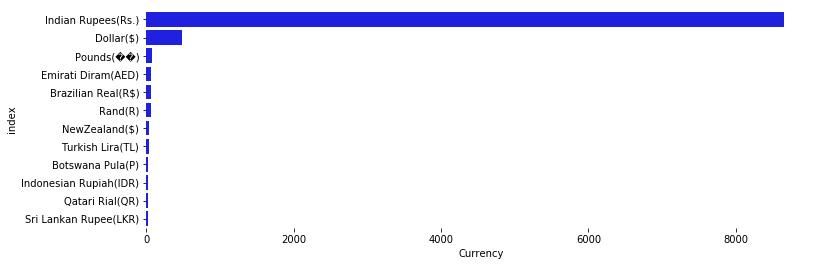

In [126]:
f, ax = plt.subplots(1,1,figsize = (12,4))
cnt = df['Currency'].value_counts().reset_index()
sns.set(style="whitegrid")
sns.barplot(y = 'index', x = 'Currency', data =cnt, color = 'b', ax = ax)
sns.despine(left=True, bottom=True)
plt.show()